In [3]:
from selenium import webdriver
import pandas as pd
import numpy as np

import requests
from bs4 import BeautifulSoup
import time
import urllib.request

from selenium.webdriver import Chrome
import re     
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import datetime as dt

from tqdm import tqdm
from urllib.request import urlretrieve

## 크롤링 역할 분담

바로 아래 코드의 web_link="*************" 에 각자 맡은 부분을 넣어주세요  
아래 코드를 한 세트라고 생각하고 각 링크별로 돌려주세요...  
링크별로 이미지 개수가 달라서 자동화 코드를 짜기가 어려웠어요...  
크롤링인데 번거롭게 해서 미안~~ ㅜㅜ

> num_page_down = 10     ##100번 내렸을 때 540까지... 적당히 바꿔주세요!!!!   
이 숫자를 대략 4000 +- 2000 왔다리갔다리 해보면서 조절하세요

> #폴더이름 설정   
keyword='#####' #이름바꾸기 코드에서 #####에는 노란색으로 표시된 요 제목을 대충 영어로 번역해서 넣어주세요
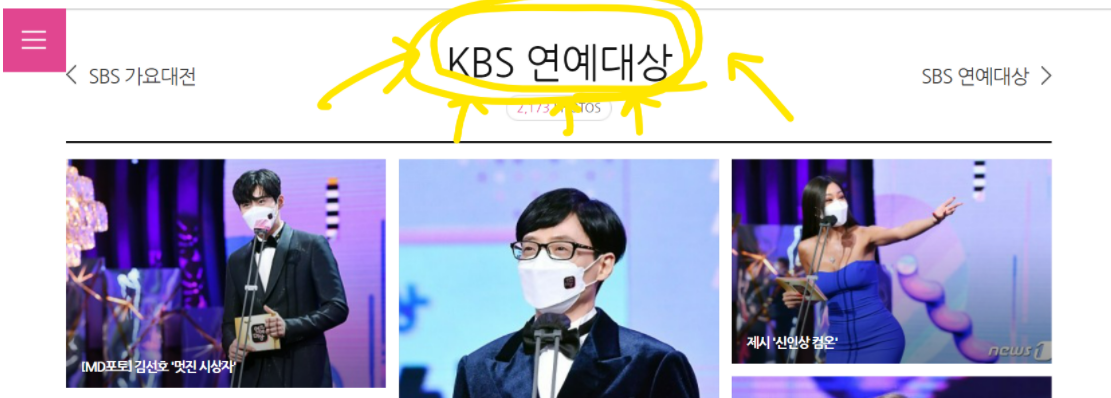

### 가영
https://entertain.naver.com/photo/issue/1086801/300
https://entertain.naver.com/photo/issue/1046990/300
https://entertain.naver.com/photo/issue/1086991/300
https://entertain.naver.com/photo/issue/1076052/300
https://entertain.naver.com/photo/issue/1074565/300
https://entertain.naver.com/photo/issue/1076039/300
https://entertain.naver.com/photo/issue/1075965/300
https://entertain.naver.com/photo/issue/1087048/300
https://entertain.naver.com/photo/issue/1075896/300
https://entertain.naver.com/photo/issue/1076047/300
https://entertain.naver.com/photo/issue/1076047/300
https://entertain.naver.com/photo/issue/1077421/300
https://entertain.naver.com/photo/issue/529764/300

### 희진
https://entertain.naver.com/photo/issue/1076401/300
https://entertain.naver.com/photo/issue/1103576/300
https://entertain.naver.com/photo/issue/1052767/300
https://entertain.naver.com/photo/issue/1084801/300
https://entertain.naver.com/photo/issue/1074633/300
https://entertain.naver.com/photo/issue/1086463/300
https://entertain.naver.com/photo/issue/1075979/300
https://entertain.naver.com/photo/issue/1074839/300
https://entertain.naver.com/photo/issue/1084893/300
https://entertain.naver.com/photo/issue/1091161/300
https://entertain.naver.com/photo/issue/1077571/300
https://entertain.naver.com/photo/issue/1074728/300
https://entertain.naver.com/photo/issue/1103580/300
https://entertain.naver.com/photo/issue/998452/300

### 성주
https://entertain.naver.com/photo/issue/1103602/300
https://entertain.naver.com/photo/issue/997246/300
https://entertain.naver.com/photo/issue/1106238/300
https://entertain.naver.com/photo/issue/908237/300
https://entertain.naver.com/photo/issue/1061209/300
https://entertain.naver.com/photo/issue/1007721/300
https://entertain.naver.com/photo/issue/1081950/300
https://entertain.naver.com/photo/issue/1076802/300
https://entertain.naver.com/photo/issue/1095330/300
https://entertain.naver.com/photo/issue/1008311/300
https://entertain.naver.com/photo/issue/1083219/300
https://entertain.naver.com/photo/issue/845617/300
https://entertain.naver.com/photo/issue/1103592/300

### 윤주
https://entertain.naver.com/photo/issue/1103592/300
https://entertain.naver.com/photo/issue/998448/300
https://entertain.naver.com/photo/issue/1074688/300
https://entertain.naver.com/photo/issue/846246/300
https://entertain.naver.com/photo/issue/846258/300
https://entertain.naver.com/photo/issue/845611/300
https://entertain.naver.com/photo/issue/1074317/300
https://entertain.naver.com/photo/issue/1013657/300
https://entertain.naver.com/photo/issue/998615/300
https://entertain.naver.com/photo/issue/1103595/300
https://entertain.naver.com/photo/issue/1089210/300
https://entertain.naver.com/photo/issue/1079385/300
https://entertain.naver.com/photo/issue/845731/300
https://entertain.naver.com/photo/issue/1094667/300

### 정균
https://entertain.naver.com/photo/issue/1103577/300
https://entertain.naver.com/photo/issue/1085175/300
https://entertain.naver.com/photo/issue/1074570/300
https://entertain.naver.com/photo/issue/1016599/300
https://entertain.naver.com/photo/issue/1074685/300
https://entertain.naver.com/photo/issue/1052843/300
https://entertain.naver.com/photo/issue/1084166/300
https://entertain.naver.com/photo/issue/1061335/300
https://entertain.naver.com/photo/issue/1086733/300
https://entertain.naver.com/photo/issue/1079877/300
https://entertain.naver.com/photo/issue/1103584/300
https://entertain.naver.com/photo/issue/1103597/300
https://entertain.naver.com/photo/issue/845613/300

In [14]:
web_link = 'https://entertain.naver.com/photo/issue/1074685/300'

driver = webdriver.Chrome('C:\\Users\\park3\\park\\chromedriver.exe')
driver.get(web_link)
body = driver.find_element_by_tag_name('body')
#웹드라이버로 url접속한 뒤 스크롤 내리기 위한 소스를 받아오는 것

time.sleep(2)

num_page_down = 5000 ### 100번 내렸을 때 540까지... 적당히 바꿔주세요!!!!
while num_page_down:
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(0.5)
    num_page_down -= 1

comment_list = []

comments = driver.find_elements_by_css_selector("li > div > p")
for comment in comments :
    try:
        com = comment.text
    except:
        com = ''
    comment_list.append(com)

img_url_list = []

images = driver.find_elements_by_css_selector("li > a > img")
for image in images :
    try:
        url = image.get_attribute('src')
    except:
        url = ''
    img_url_list.append(url)

#폴더이름 설정
keyword = 'showcase'
#폴더생성
import os
if not os.path.isdir('./img/{}'.format(keyword)):
    os.mkdir('./img/{}'.format(keyword))

#이미지 다운로드
filetype='.jpg'
for index, link in tqdm(enumerate(img_url_list[:len(comment_list)])):
    urlretrieve(link,'./img/{}/{}{}{}'.format(keyword,keyword,index,filetype))

df = pd.DataFrame({'caption':comment_list,'link':img_url_list[:len(comment_list)]})

df['route'] = 0
for i in range(len(comment_list)):
    df.iloc[i, 2] = './img/{}{}.jpg'.format(keyword,i)

df.to_excel('naver_{}.xlsx'.format(keyword))

driver.quit()

28100it [1:37:27,  4.81it/s]


In [2]:
driver = webdriver.Chrome('C:\selenium\chromedriver.exe')

web_link = "*******"
driver.get(web_link)

In [3]:
body = driver.find_element_by_tag_name('body')
#웹드라이버로 url접속한 뒤 스크롤 내리기 위한 소스를 받아오는 것

time.sleep(2)

num_page_down = 10 #### 100번 내렸을 때 540까지... 적당히 바꿔주세요!!!!
while num_page_down:
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(0.5)
    num_page_down -= 1

In [4]:
comment_list = []

comments = driver.find_elements_by_css_selector("li > div > p")
for comment in comments :
    try:
        com = comment.text
    except:
        com = ''
    comment_list.append(com)

In [5]:
img_url_list = []

images = driver.find_elements_by_css_selector("li > a > img")
for image in images :
    try:
        url = image.get_attribute('src')
    except:
        url = ''
    img_url_list.append(url)

In [10]:
#폴더이름 설정
keyword='#####' #이름바꾸기
#폴더생성
import os
if not os.path.isdir('./img/{}'.format(keyword)):
    os.mkdir('./img/{}'.format(keyword))

#이미지 다운로드
filetype='.jpg'
for index, link in tqdm(enumerate(img_url_list[:len(comment_list)])):
    urlretrieve(link,'./img/{}/{}{}{}'.format(keyword,keyword,index,filetype))

40it [00:02, 14.94it/s]


In [6]:
df = pd.DataFrame({'caption':comment_list,'link':img_url_list[:len(comment_list)]})

df['route'] = 0
for i in range(len(comment_list)):
    df.iloc[i, 2] = './img/#####{}.jpg'.format(i)

df

,caption,link
0,"[현장포토] ""소년미 한가득”...김병관, 풋풋한 설렘",https://ssl.pstatic.net/mimgnews/image/origin/...
1,"[현장포토] ""귀요미 or 시크”...찬, 막내의 분위기",https://ssl.pstatic.net/mimgnews/image/origin/...
2,"[현장포토] ""무한발산”...동훈, 출구없는 매력",https://ssl.pstatic.net/mimgnews/image/origin/...
3,"[현장포토] ""여심을 녹인다”...에이스, 미리 만난 봄",https://mimgnews.pstatic.net/image/origin/433/...
4,"[현장포토] ""비주얼, WOW”...와우, 판타지 보이",https://ssl.pstatic.net/mimgnews/image/origin/...
5,"[현장포토] ""비주얼 에이스”...준, 리더의 자신감",https://ssl.pstatic.net/mimgnews/image/origin/...
6,"[HD포토] ""심멎 아이컨택""ㅣ'데이식스' 도운",https://ssl.pstatic.net/mimgnews/image/origin/...
7,"[HD포토] ""설렘유발자""ㅣ'데이식스' 원필",https://ssl.pstatic.net/mimgnews/image/origin/...
8,"[HD포토] ""매력적인 남자""ㅣ'데이식스' Young K",https://ssl.pstatic.net/mimgnews/image/origin/...
9,"[HD포토] ""메리 크리스마스!""ㅣ'데이식스'",https://ssl.pstatic.net/mimgnews/image/origin/...


In [8]:
df.to_excel('naver_#####.xlsx')

In [9]:
driver.quit()